In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('car_test_results.csv')
df2 = pd.read_csv('car_test_weather.csv')

In [8]:
merge = pd.merge(df, df2)
merge

,test_date,week_number,model,brake_distance,top_speed,power,drag_coefficient,fuel_efficiency,turning_radius,Test Date,Precipitation,Cloud Cover,Temperature,Humidity,Wind Speed
0,1/1/2022,1,Tether,43.76,135.92,192.06,0.44,45.63,13.80,1/1/2022,3.03,1,6.11,77.02,9.31
1,1/1/2022,1,Tether,47.80,141.75,189.67,0.51,45.99,16.75,1/1/2022,3.03,1,6.11,77.02,9.31
2,1/1/2022,1,Tether,52.08,146.92,186.03,0.56,45.31,19.57,1/1/2022,3.03,1,6.11,77.02,9.31
3,1/1/2022,1,Lisk,37.22,129.29,186.76,0.43,48.29,13.78,1/1/2022,3.03,1,6.11,77.02,9.31
4,1/1/2022,1,Lisk,37.56,139.58,184.37,0.50,46.21,15.41,1/1/2022,3.03,1,6.11,77.02,9.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,12/24/2022,52,Lisk,48.13,158.45,185.85,0.56,53.12,27.89,24/12/2022 00:00,2.37,4,2.21,82.50,3.83
635,12/24/2022,52,Dash,42.39,120.85,191.80,0.27,52.18,13.81,24/12/2022 00:00,2.37,4,2.21,82.50,3.83
636,12/24/2022,52,Dash,44.71,132.87,188.24,0.29,53.85,17.18,24/12/2022 00:00,2.37,4,2.21,82.50,3.83
637,12/24/2022,52,Dash,46.51,142.75,184.22,0.33,53.23,21.02,24/12/2022 00:00,2.37,4,2.21,82.50,3.83


In [16]:
group = merge.groupby(['test_date', 'model']).mean(numeric_only = True).reset_index()
group

,test_date,model,week_number,brake_distance,top_speed,power,drag_coefficient,fuel_efficiency,turning_radius,Precipitation,Cloud Cover,Temperature,Humidity,Wind Speed
0,1/1/2022,Dash,1.0,43.860000,134.722500,185.692500,0.390000,55.662500,17.595000,3.03,1.0,6.11,77.02,9.31
1,1/1/2022,Lisk,1.0,38.212500,142.990000,183.080000,0.522500,47.265000,16.735000,3.03,1.0,6.11,77.02,9.31
2,1/1/2022,Tether,1.0,47.880000,141.530000,189.253333,0.503333,45.643333,16.706667,3.03,1.0,6.11,77.02,9.31
3,1/15/2022,Dash,3.0,45.807500,141.257500,186.967500,0.452500,53.995000,21.427500,3.29,1.0,4.42,75.88,10.93
4,1/15/2022,Lisk,3.0,38.695000,145.575000,184.407500,0.525000,47.625000,19.952500,3.29,1.0,4.42,75.88,10.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,9/24/2022,Lisk,39.0,45.517500,155.887500,184.455000,0.515000,54.905000,13.832500,4.91,2.0,12.22,71.41,8.02
152,9/24/2022,Tether,39.0,48.818000,176.252000,185.236000,0.570000,51.744000,16.754000,4.91,2.0,12.22,71.41,8.02
153,9/3/2022,Dash,36.0,51.040000,159.046000,177.396000,0.338000,60.934000,16.100000,3.55,3.0,15.31,74.84,4.48
154,9/3/2022,Lisk,36.0,42.423333,151.033333,182.270000,0.453333,55.046667,16.083333,3.55,3.0,15.31,74.84,4.48


In [45]:
group2= df.groupby('model').count()
group2

,test_date,week_number,brake_distance,top_speed,power,drag_coefficient,fuel_efficiency,turning_radius
model,,,,,,,,
Dash,213,213,213,213,213,213,213,213
Lisk,211,211,211,211,211,211,211,211
Tether,215,215,215,215,215,215,215,215


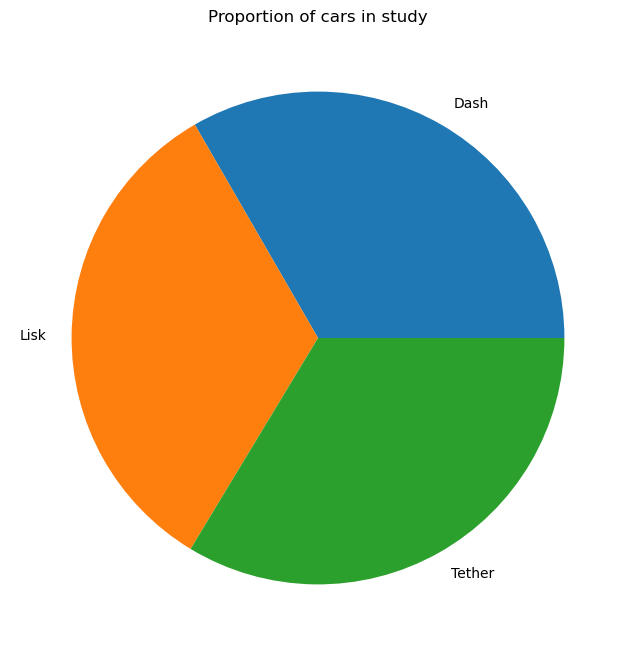

In [48]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.pie(x = group2.brake_distance, labels = group2.index)

ax.set_title('Proportion of cars in study')
ax.set_facecolor('#f4f4f4')

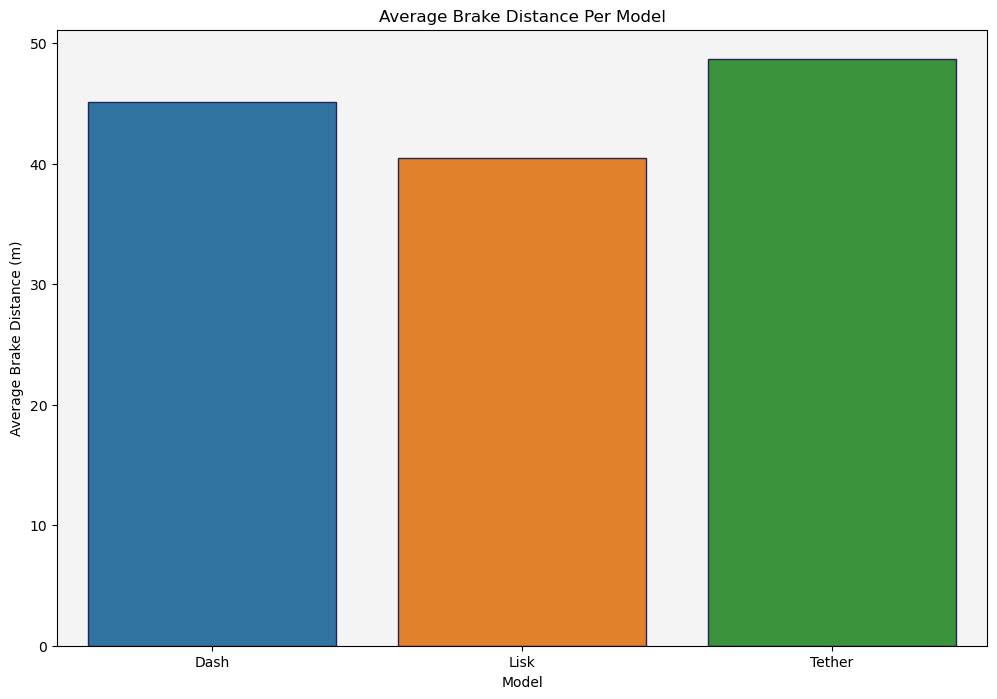

In [37]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.barplot(data = group, x = 'model', y = 'brake_distance', ec='#242456', errorbar = None)
ax.set_xlabel('Model')
ax.set_ylabel('Average Brake Distance (m)')
ax.set_title('Average Brake Distance Per Model')
ax.set_facecolor('#f4f4f4')

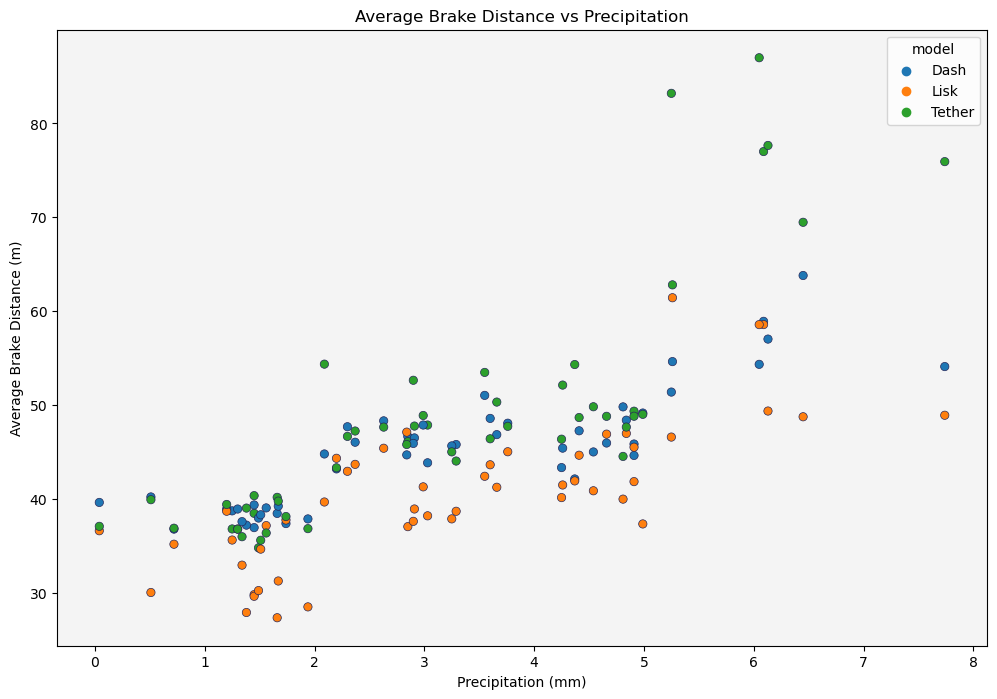

In [22]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.scatterplot(data = group, x = 'Precipitation', y = 'brake_distance' , hue = 'model', ec='#242456')
ax.set_xlabel('Precipitation (mm)')
ax.set_ylabel('Average Brake Distance (m)')
ax.set_title('Average Brake Distance vs Precipitation')
ax.set_facecolor('#f4f4f4')

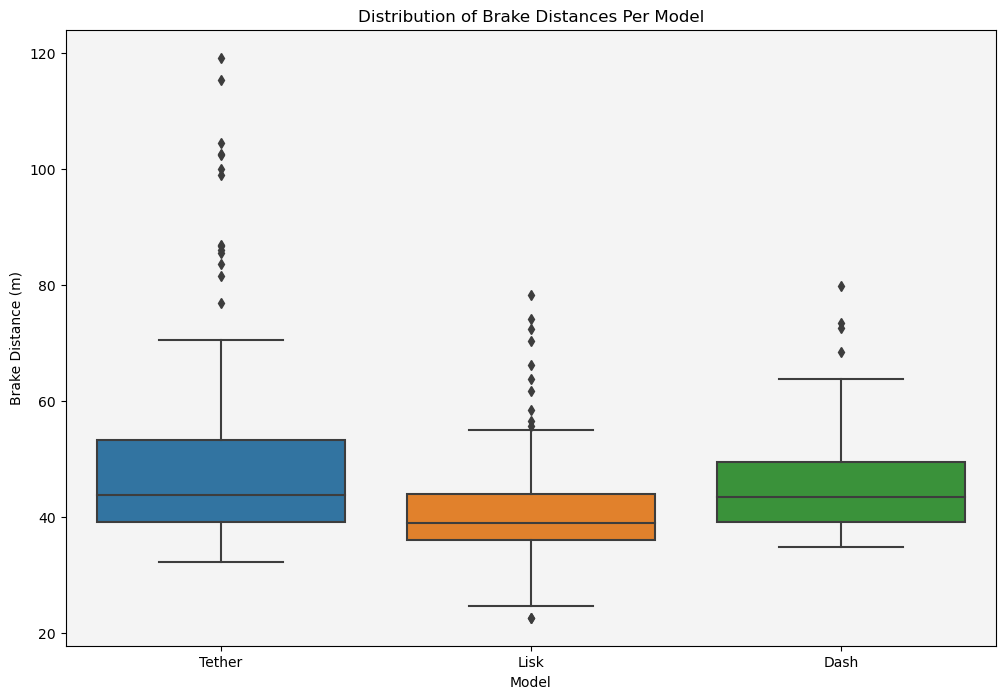

In [32]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.boxplot(data = df, y = 'brake_distance', x = 'model', orient = 'v')
ax.set_ylabel('Brake Distance (m)')
ax.set_xlabel('Model')
ax.set_title('Distribution of Brake Distances Per Model')
ax.set_facecolor('#f4f4f4')

In [61]:

group3 = group.set_index('test_date').resample('W').mean(numeric_only = True)

In [63]:
group3

,week_number,brake_distance,top_speed,power,drag_coefficient,fuel_efficiency,turning_radius,Precipitation,Cloud Cover,Temperature,Humidity,Wind Speed
test_date,,,,,,,,,,,,
2022-01-02,1.0,43.317500,139.747500,186.008611,0.471944,49.523611,17.012222,3.03,1.0,6.11,77.02,9.31
2022-01-09,2.0,36.458000,146.057333,187.530667,0.488667,54.008667,16.551111,1.45,2.0,5.31,75.49,8.25
2022-01-16,3.0,42.849722,144.427500,187.843889,0.522500,51.060000,19.726667,3.29,1.0,4.42,75.88,10.93
2022-01-23,4.0,60.401778,131.592889,186.315778,0.507333,52.455556,21.448667,5.25,2.0,5.39,76.41,11.19
2022-01-30,5.0,35.084056,152.380611,191.362056,0.462167,52.295722,17.800167,1.45,4.0,3.65,84.40,7.47
2022-02-06,6.0,59.657778,130.037222,185.799722,0.470556,49.209444,18.617222,7.74,6.0,5.49,74.21,9.76
2022-02-13,7.0,44.782000,141.754944,186.999500,0.524222,55.163389,18.112722,4.81,5.0,5.60,71.25,13.72
2022-02-20,8.0,45.176500,142.229167,185.420833,0.589833,50.577500,19.195667,4.99,5.0,7.58,73.53,11.80
2022-02-27,9.0,60.683333,131.414667,185.384889,0.482444,52.732667,20.036000,6.45,7.0,5.76,75.98,8.21


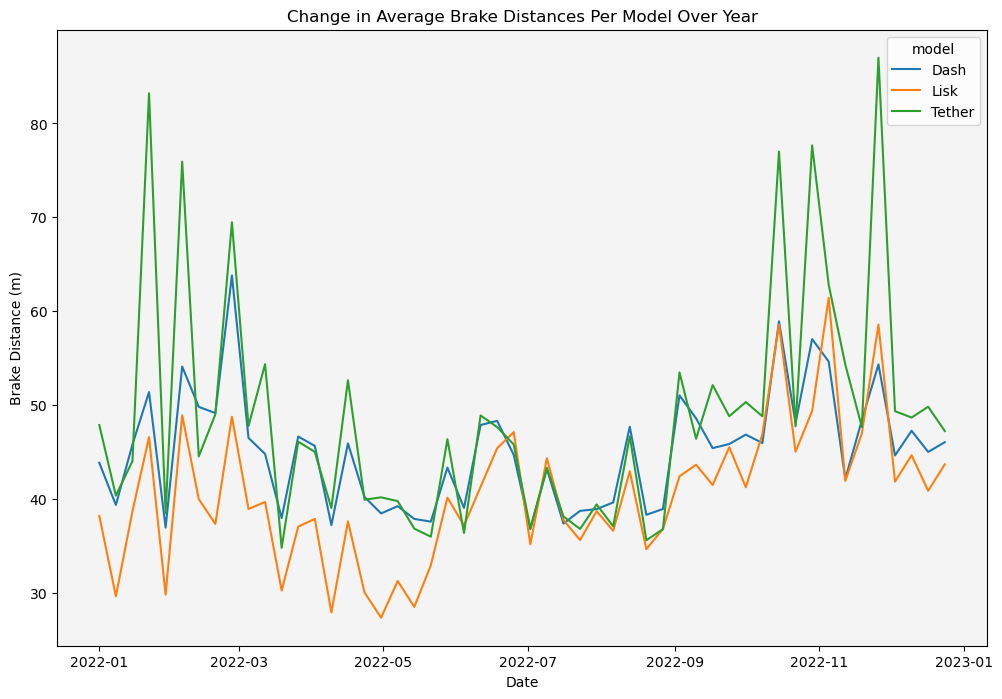

In [65]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.lineplot(data = group, y = 'brake_distance', x = 'test_date', errorbar = None, hue = 'model')
ax.set_ylabel('Brake Distance (m)')
ax.set_xlabel('Date')
ax.set_title('Change in Average Brake Distances Per Model Over Year')
ax.set_facecolor('#f4f4f4')